In [10]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
%matplotlib inline
plt.rcParams['font.family'] = 'AppleGothic'

In [2]:
!pip install plotly

In [11]:
df = pd.read_csv('./tenant_crawling_202311091506.csv', encoding = 'utf-8') # tenant_seq = 12 , 메밀집에 대한 정보 적재되어 있는 테이블 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   seq                       7 non-null      int64  
 1   tenant_seq                7 non-null      int64  
 2   nv_gender_male            7 non-null      int64  
 3   nv_gender_female          7 non-null      int64  
 4   nv_age_top1               7 non-null      int64  
 5   nv_age_top2               7 non-null      int64  
 6   nv_labels                 0 non-null      float64
 7   nv_visitor_review_cnt     7 non-null      int64  
 8   nv_blog_review_cnt        7 non-null      int64  
 9   nv_search_volume_monthly  7 non-null      int64  
 10  kk_rating                 7 non-null      float64
 11  kk_rating_cnt             7 non-null      int64  
 12  kk_review_cnt             7 non-null      int64  
 13  kk_place_cnt              7 non-null      int64  
 14  gg_rating     

In [14]:
df['create_at']

0    2023-05-16 19:16:42
1    2023-06-12 11:34:19
2    2023-07-10 16:32:35
3    2023-08-04 15:11:05
4    2023-09-07 11:21:05
5    2023-10-25 15:48:57
6    2023-11-06 18:56:08
Name: create_at, dtype: object

In [15]:
df['create_at'] = pd.to_datetime(df['create_at'])

In [16]:
df

,seq,tenant_seq,nv_gender_male,nv_gender_female,nv_age_top1,nv_age_top2,nv_labels,nv_visitor_review_cnt,nv_blog_review_cnt,nv_search_volume_monthly,...,tenant_status,create_at,update_at,delete_at,sales_min,sales_max,sales_month,sales_status,sales_title,gg_url
0,12,12,42,58,20,30,NaN,2039,550,6270,...,2,2023-05-16 19:16:42,2023-06-12 17:42:58,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,12989,12,43,57,20,30,NaN,2172,586,7290,...,2,2023-06-12 11:34:19,2023-07-14 20:12:21,NaN,60000000.0,74000000.0,5.0,success,메밀집,NaN
2,14846,12,43,57,20,60,NaN,2277,634,8030,...,2,2023-07-10 16:32:35,2023-07-27 14:08:15,NaN,55000000.0,68000000.0,6.0,success,메밀집,NaN
3,20515,12,43,57,20,60,NaN,2356,671,7500,...,2,2023-08-04 15:11:05,2023-08-29 12:36:46,NaN,52000000.0,64000000.0,7.0,success,메밀집,NaN
4,26287,12,44,56,20,30,NaN,2485,715,6920,...,2,2023-09-07 11:21:05,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,38384,12,43,57,20,30,NaN,0,0,4040,...,2,2023-10-25 15:48:57,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,41016,12,43,57,20,30,NaN,0,0,4010,...,2,2023-11-06 18:56:08,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [17]:
df['month'] = df['create_at'].dt.month 

In [18]:
df

,seq,tenant_seq,nv_gender_male,nv_gender_female,nv_age_top1,nv_age_top2,nv_labels,nv_visitor_review_cnt,nv_blog_review_cnt,nv_search_volume_monthly,...,create_at,update_at,delete_at,sales_min,sales_max,sales_month,sales_status,sales_title,gg_url,month
0,12,12,42,58,20,30,NaN,2039,550,6270,...,2023-05-16 19:16:42,2023-06-12 17:42:58,NaN,NaN,NaN,0.0,NaN,NaN,NaN,5
1,12989,12,43,57,20,30,NaN,2172,586,7290,...,2023-06-12 11:34:19,2023-07-14 20:12:21,NaN,60000000.0,74000000.0,5.0,success,메밀집,NaN,6
2,14846,12,43,57,20,60,NaN,2277,634,8030,...,2023-07-10 16:32:35,2023-07-27 14:08:15,NaN,55000000.0,68000000.0,6.0,success,메밀집,NaN,7
3,20515,12,43,57,20,60,NaN,2356,671,7500,...,2023-08-04 15:11:05,2023-08-29 12:36:46,NaN,52000000.0,64000000.0,7.0,success,메밀집,NaN,8
4,26287,12,44,56,20,30,NaN,2485,715,6920,...,2023-09-07 11:21:05,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,9
5,38384,12,43,57,20,30,NaN,0,0,4040,...,2023-10-25 15:48:57,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,10
6,41016,12,43,57,20,30,NaN,0,0,4010,...,2023-11-06 18:56:08,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,11


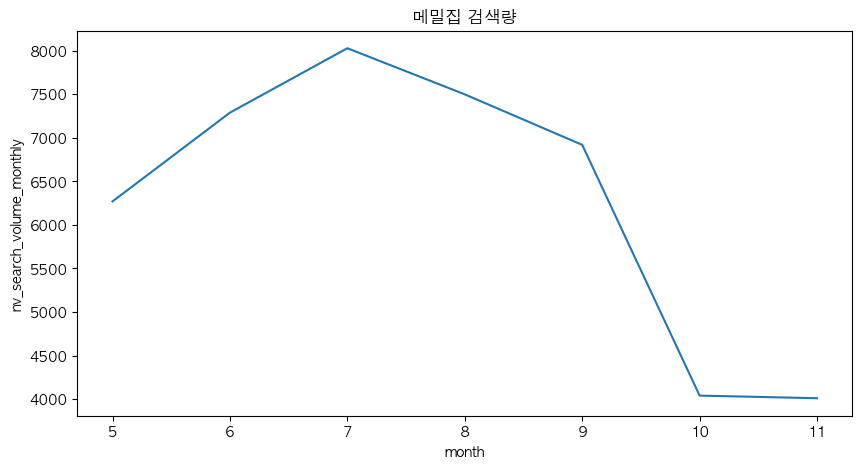

In [19]:
plt.figure(figsize = (10,5))
sns.lineplot(data=df, x = 'month',y='nv_search_volume_monthly').set(title = '메밀집 검색량') 
plt.show()
# 검색량 데이터 - 트렌드 파악을 위한 정보제공 창구가 될 수 있다고 생각. 
# NaN 값으로 잡히는 데이터 


# - tenant_seq 별로 클릭 시 , 월별 검색량을 알수있는 대시보드 칸 생성 (테이블 생성 -> 대시보드화) 


<Axes: xlabel='month', ylabel='nv_search_volume_monthly'>

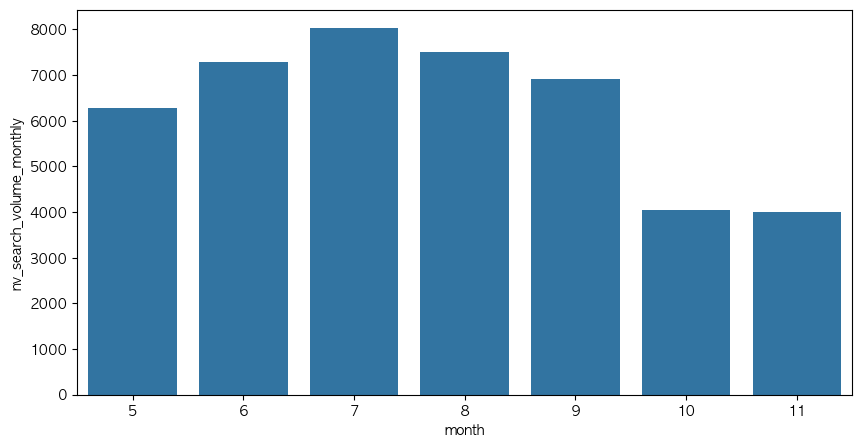

In [20]:
plt.figure(figsize = (10,5))
sns.barplot(data=df, x = 'month',y='nv_search_volume_monthly')